## Decision Tree Classification

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [2]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


\<a id='equation'></a>
### Equation and Method

The basic idea behind this is similar to Decision tree regression, The data is divided into regions according to the entropy or some other factor and then new data points are mapped to the regions and given the class according to the region.

<a id='preprocessing'></a>
### Pre processing

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
datset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='building'></a>
### Building the model.
Training the model, We use Decision Tree classifier using entropy model using the [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class.
The criterion is entropy for information gain.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [11]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

<a id='result'></a>
### Result

In [14]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

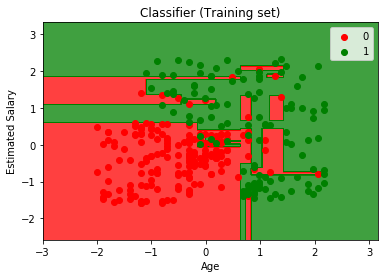

In [15]:
plot_regions(x_train, y_train, 'Classifier (Training set)')

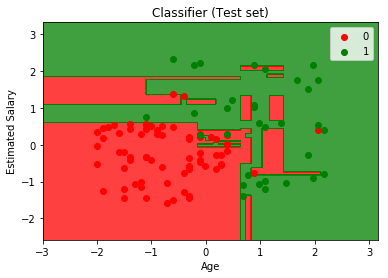

In [16]:
plot_regions(x_test, y_test, 'Classifier (Test set)')

##### Conclusion

We can see that this model can be used for building models where the data are not linearly seperable, i.e here in this example, this model did a better job at classifying red points that are inside the typical green zone.